# Atividades

In [71]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import skimage.restoration
from skimage.color import rgb2gray
from skimage.io import imsave
import numpy as np
from skimage.filters import threshold_otsu, threshold_local, threshold_triangle, threshold_minimum
from skimage.filters import sobel,roberts,prewitt,scharr
from skimage.draw import rectangle,rectangle_perimeter
from statistics import pstdev


1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

In [2]:
def ler_cinza(nome):
    imagem = imread(nome)[:,:,:3]
    cinza = rgb2gray(imagem)
    return cinza, imagem

In [3]:
nameFile = 'pearl.jpg'

In [4]:
cinza, imagem = ler_cinza(nameFile);
imagem.shape

(342, 608, 3)

In [5]:
def manyShow(*imgs, color=None):
    _, ax = plt.subplots(1, len(imgs), figsize=(20, 20),sharex=True)
    for index, i in enumerate(ax):
        i.imshow(imgs[index], cmap=color)
        i.axis('off')

In [6]:
def manyShowWithTitle(*imgs, color=None):
    _, ax = plt.subplots(1, len(imgs), figsize=(20, 20),sharex=True)
    for index, i in enumerate(ax):
        i.imshow(imgs[index]['img'], cmap=color)
        i.set_title(imgs[index]['title'])
        i.axis('off')

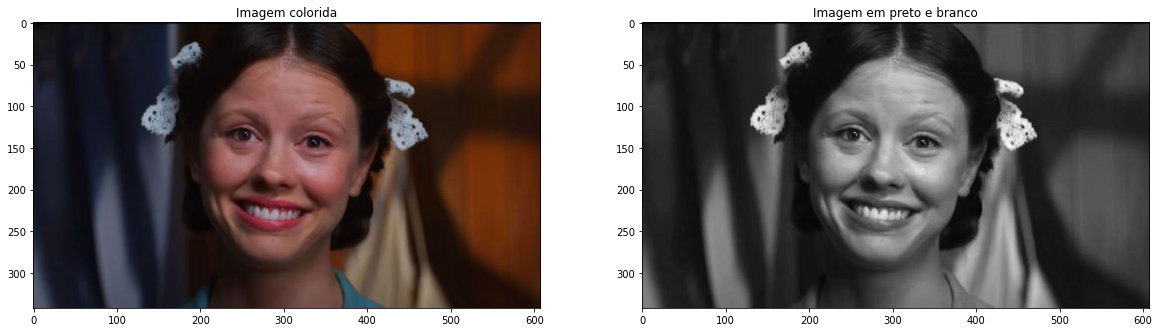

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20, 20),sharex=True)
ax[0].imshow(imagem);
ax[0].set_title('Imagem colorida');
ax[1].imshow(cinza, cmap = 'gray');
ax[1].set_title('Imagem em preto e branco');

In [8]:
imsave(f'{nameFile.split(".")[0]}_b&w.png', cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [9]:
cinza.shape

(342, 608)

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

In [10]:
def zeroVizinho(imagem):
    linhas, colunas = imagem.shape
    
    for l in range(linhas):
        for c in range(colunas - 1):
            if (imagem[l, c] == imagem[l, c+1]):
                imagem[l, c] = 0
    

    plt.imshow(imagem, cmap='gray')
    imsave(f'{nameFile.split(".")[0]}_b&w_zero.png', imagem);

    return imagem

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


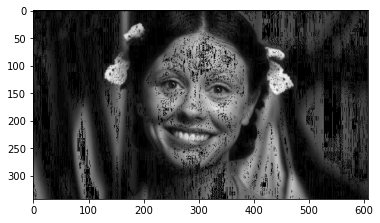

In [11]:
aux2, _ = ler_cinza(nameFile)
zeroVizinho(aux2);

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [12]:
def verDimensao(dimensao):
    if dimensao == 0:
        resultado = 'r'
    elif dimensao == 1:
        resultado = 'g'
    else:
        resultado = 'b'
    return resultado

In [13]:
def maiorMenor(imagem):
    linhas, colunas, dimensoes = imagem.shape
    
    maior = {'r': 0, 'g': 0, 'b': 0}
    menor = {'r': 255, 'g': 255, 'b': 255}
    
    for d in range(dimensoes):
        color = verDimensao(d)

        for l in range(linhas):
            for c in range(colunas - 1):
                if (imagem[l, c, d] > maior[color]):
                    maior[color] = imagem[l, c, d]
                if (imagem[l, c, d] < menor[color]):
                    menor[color] = imagem[l, c, d]
    
    return maior, menor

In [14]:
maior, menor = maiorMenor(imagem)
print(f'Maiores intensidade:..................{maior}')
print(f'Menores intensidade:..................{menor}')

Maiores intensidade:..................{'r': 211, 'g': 184, 'b': 210}
Menores intensidade:..................{'r': 0, 'g': 0, 'b': 0}


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

In [15]:
def aumentaIntensidade(imagem):
    red = imagem[:,:,0]
    green = imagem[:,:,1]
    blue = imagem[:,:,2]

    linhas, colunas, _ = imagem.shape

    for d in [ red, green, blue ]:
        for l in range(linhas):
            for c in range(colunas):
                if d[l, c] > 150:
                    d[l, c] = 255 # Eh adicionado a maior intensidade para aquele pixel.
    
    juntado = np.dstack( (red, green, blue) ) # Junta as 3 imagens.

    return {'red': red, 'green': green, 'blue': blue, 'juntado': juntado}

In [16]:
aux = imread(nameFile)
imagemAu = aumentaIntensidade(aux);

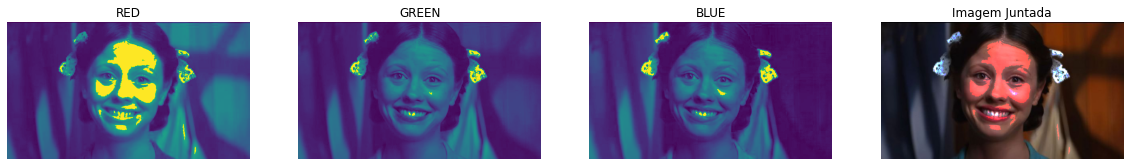

In [17]:
manyShowWithTitle(
    #{'img': imagem, 'title': 'Original'},
    {'img': imagemAu['red'], 'title': 'RED'},
    {'img': imagemAu['green'], 'title': 'GREEN'},
    {'img': imagemAu['blue'], 'title': 'BLUE'},
    {'img': imagemAu['juntado'], 'title': 'Imagem Juntada'}
)

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

In [18]:
def ruido(imagem, modo):
    return skimage.util.random_noise(imagem, mode=modo, seed=None, clip=True)

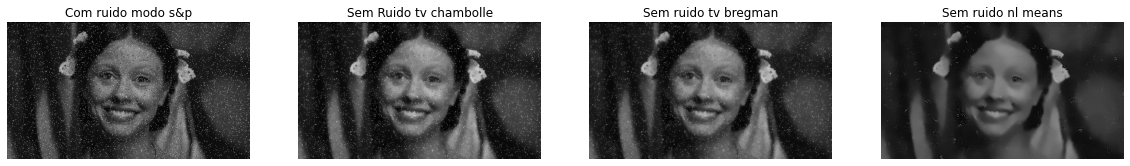

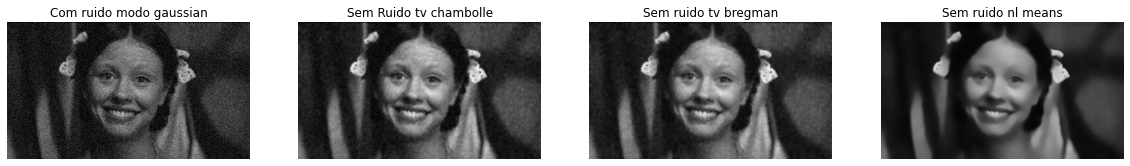

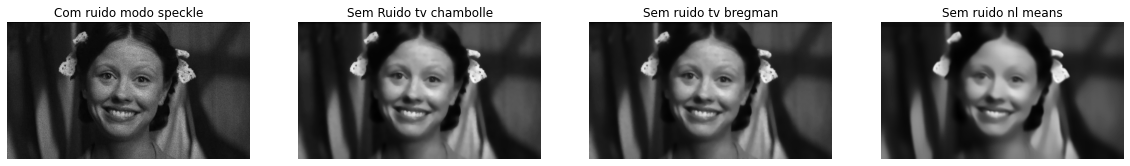

In [19]:
for i in ['s&p', 'gaussian', 'speckle']:
    originalBW, original = ler_cinza(nameFile)
    img = ruido( originalBW , i)
    denoise = skimage.restoration.denoise_tv_chambolle(img)
    denoise2 = skimage.restoration.denoise_tv_bregman(img)
    denoise3 = skimage.restoration.denoise_nl_means(img,10)
    manyShowWithTitle(
        # {'img': original, 'title': f'Original'},
        # {'img': originalBW, 'title': f'Original W&B'},
        {'img': img, 'title': f'Com ruido modo {i}'},
        {'img': denoise, 'title': f'Sem Ruido tv chambolle'},
        {'img': denoise2, 'title': f'Sem ruido tv bregman'},
        {'img': denoise3, 'title': f'Sem ruido nl means'},
        color='gray'
    )

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

In [20]:
def binarizar(cinza):
    otsu = threshold_otsu(cinza)
    binarizada = cinza > otsu

    local = threshold_local(cinza)
    binarizadaLocal = cinza > local

    tri = threshold_triangle(cinza)
    binarizadaTri = cinza > tri

    mini = threshold_minimum(cinza)
    binarizadaMini = cinza > mini    

    return binarizada, binarizadaLocal, binarizadaTri, binarizadaMini

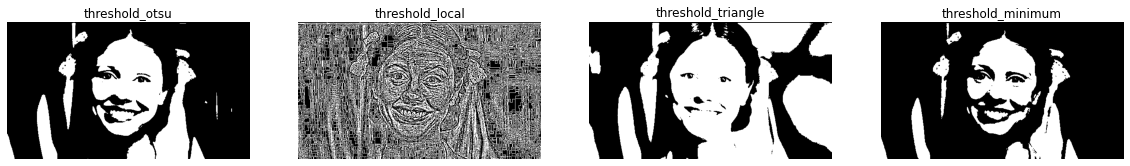

In [21]:
b, local, tri, mini = binarizar(cinza)
manyShowWithTitle(
    #{'img': cinza, 'title': 'Original'},
    {'img': b, 'title': 'threshold_otsu'},
    {'img': local, 'title': 'threshold_local'},
    {'img': tri, 'title': 'threshold_triangle'},
    {'img': mini, 'title': 'threshold_minimum'},
    color='gray'
)

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

In [22]:
def bordas(cinza):
    sob = sobel(cinza)
    rob = roberts(cinza)
    pre = prewitt(cinza)
    scha = scharr(cinza)
    return sob,rob,pre,scha

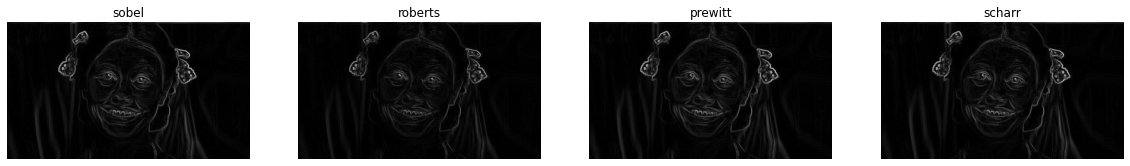

In [23]:
sob,rob,pre,scha = bordas(cinza)
manyShowWithTitle(
    #{'img': cinza, 'title': 'Original'},
    {'img': sob, 'title': 'sobel'},
    {'img': rob, 'title': 'roberts'},
    {'img': pre, 'title': 'prewitt'},
    {'img': scha, 'title': 'scharr'},
    color='gray'
)

8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

In [64]:
def mediaMaior(imagem):
    maior = {'color': 0, 'media': 0}

    for i in range(3):
        if maior['media'] < imagem[:,:,i].mean():
            maior = {'color': i, 'media': round(imagem[:,:,i].mean(), 2)}

    return maior

In [73]:
maior = mediaMaior(imagem)

47.448136659209545